In [1]:
# Loads the autoreload extension in Notebook
%load_ext autoreload
# Sets the autoreload mode to reload all modules before executing code
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from caits.properties import rolling_rms
from caits.visualization import plot_signal
from utils import load_wav_instance, load_csv_instance

# Audio - uni-axis

In [3]:
audio = load_wav_instance(path="data/yes.wav")

In [ ]:
print(audio.keys())
print(audio["shape"])

dict_keys(['signal', 'params', 'channels', 'sr', 'shape'])
(16000,)


In [5]:
rms = rolling_rms(audio["signal"], 300, 150)

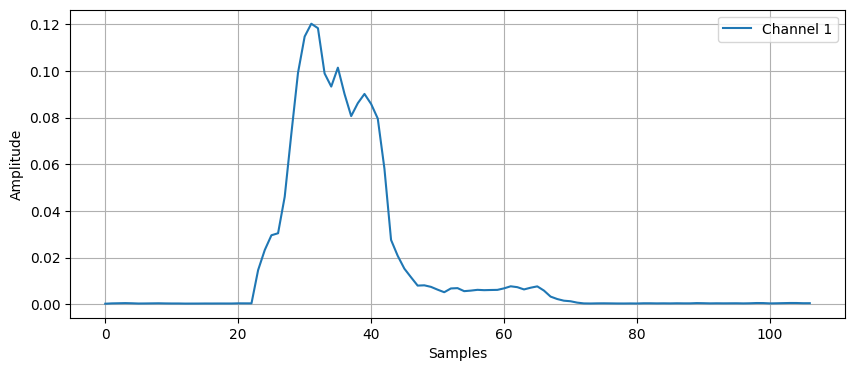

In [6]:
plot_signal(rms, return_mode=False)

# Motion

In [7]:
motion = load_csv_instance(path="data/scratching_eye.csv")
sr_motion = 100  # 100 Hz sampling rate


In [8]:
motion["signal"].shape

(1034, 6)

In [9]:
motion["channels"]

['acc_x_axis_g',
 'acc_y_axis_g',
 'acc_z_axis_g',
 'gyr_x_axis_deg/s',
 'gyr_y_axis_deg/s',
 'gyr_z_axis_deg/s']

### Applying Rolling RMS to a single axis

In [10]:
axis = motion["signal"][:, 0]
print(axis.shape)

(1034,)


In [11]:
rms_sig = rolling_rms(axis, 300, 150)

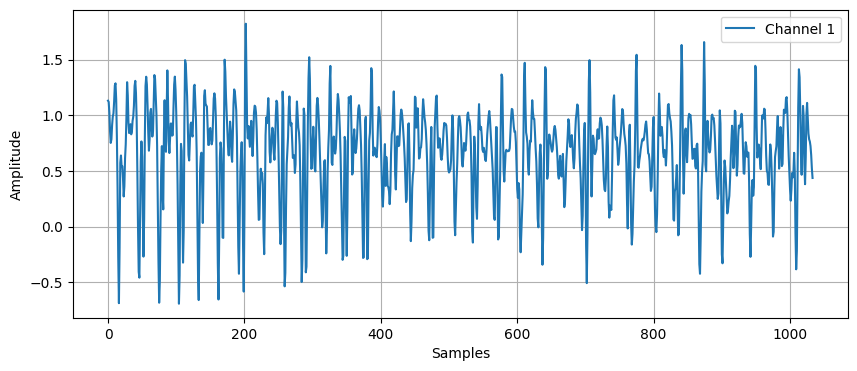

In [12]:
plot_signal(axis, return_mode=False)

### Applying Rolling RMS to multiple axes

In [13]:
dict_rms = {}
for i in range(len(motion["channels"])):
    dict_rms[motion["channels"][i]] = rolling_rms(motion["signal"][:, i], 100, 50)

dict_rms.keys()

dict_keys(['acc_x_axis_g', 'acc_y_axis_g', 'acc_z_axis_g', 'gyr_x_axis_deg/s', 'gyr_y_axis_deg/s', 'gyr_z_axis_deg/s'])

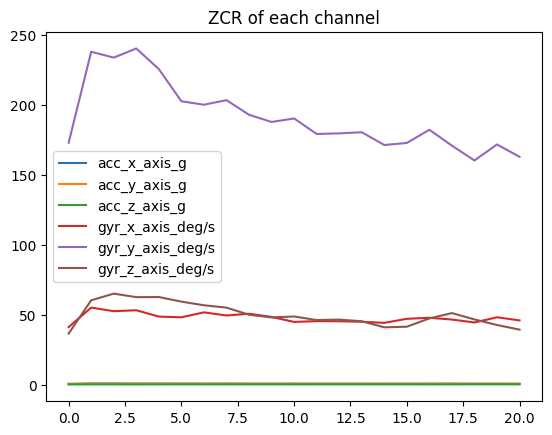

In [14]:
for key, values in dict_rms.items():
    plt.plot(values, label=key)

plt.title("ZCR of each channel")
plt.legend()